All the functions we need are in the file **data_grabber.py**. In the future I'd like to make this tool pip-installable, but for now you need to actually put data_grabber.py in the directory you're working in and import it.

In [1]:
from data_grabber import *

Next, just copy and paste the URL of the market you're trying to get data for.

In [2]:
url = "https://manifold.markets/QuantumObserver/will-the-lk99-room-temp-ambient-pre"

Then, you can use the **get_data()** function to pull the price vs time data from the URL page. There are a couple different ways to use **get_data()**. The simplest is to just pass in the URL, with no other arguments. This returns a list containing two lists -- the first is a list of datetimes, and the second is a list of corresponding prices at each datetime. **Imporant -- these times are all East Coast US time (since I mostly wrote this tool for myself to use. But if other people start actually using it I'll add in better support for different timezones.**

In [3]:
[times, prices] = get_data(url)

getting data...
done


Then you can do whatever you want with the data. Maybe you want to plot it, for example:

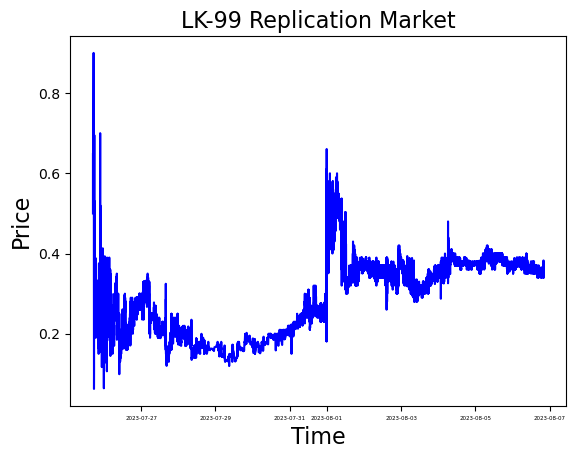

In [4]:
import matplotlib.pyplot as plt

plt.plot(times,prices,color='Blue')

plt.xticks(fontsize=4) 
plt.ylabel("Price",fontsize=16)
plt.xlabel("Time",fontsize=16)
plt.title("LK-99 Replication Market",fontsize=16)
plt.show()

With **get_data()** you can also choose to write the results to a CSV rather than storing them in Python variables (or do both at the same time). For example:

In [5]:
get_data(url, csv_file="output.csv");

## if you want to do both, just write:
## [times,prices] = get_data(url, csv_file="output.csv")

getting data...
writing csv...
done


So far, we've been pulling all of the timeseries data available for the market (from the earliest possible time, to the most recent). But if you want, you can define a start time and end time to limit your results. These need to be defined as datetime objects, like this:

In [6]:
from datetime import datetime

start_time = "2023-07-29 00:00:00"
est = pytz.timezone('US/Eastern')
start_time = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
start_time = est.localize(start_time)

end_time = "2023-07-31 00:00:00"
end_time = datetime.strptime(end_time, '%Y-%m-%d %H:%M:%S')
end_time = est.localize(end_time)

Yeah, unfortunately dealing with the date formats is a bit of a hassle now. In the future I'd like to improve it and make it easier.

Anyway, after defining these **start_time** and **end_time** variables, you can pass them into **get_data()** like so:

In [7]:
[times,prices] = get_data(url, start_time=start_time, end_time=end_time)

getting data...
done


Another thing you can do is pass in an **interval** argument, which can be either "day", "hour", "minute", or "second". This will give the output at these time intervals. For example, this is how to get the price at each hour:

In [8]:
[times,prices] = get_data(url, start_time=start_time, end_time=end_time, interval="hour")

getting data...
done


If you have any questions or feature requests, feel free to email me at *mikest@udel.edu*. Lastly I just want to end by thanking Manifold Markets for doing awesome work and making their API publicly available for hobbyists like me. They're a great company and I encourage you to sign up for an account with them if you haven't already.